### Deriving Derivatives

#### Shift in the drift 

Consider an investor who has a view on the expected value of the distribution. A view that the expected value of the index should be higher than suggested by the market corresponds to a believed distribution which is biased towards higher values of the index. In the small enough near-ATM region this is easily recognizable as the profile of a forward contract.

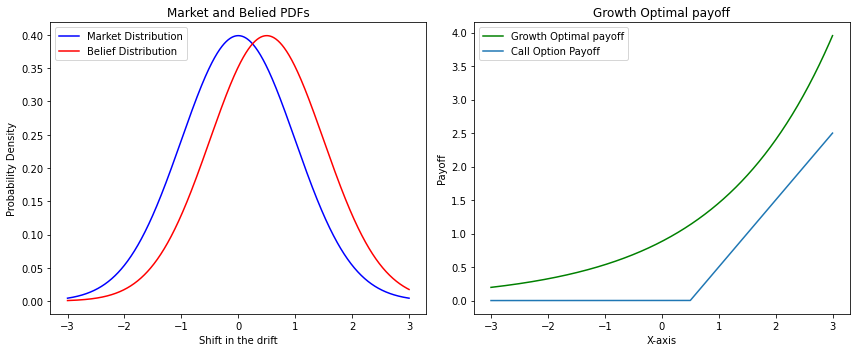

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


mu = 0 
sigma = 1  

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
market_pdf = norm.pdf(x, mu, sigma)
belief_pdf = norm.pdf(x, mu+0.5, sigma)
growth_optimal_payoff = belief_pdf / market_pdf

def call_option_payoff(spot_price, strike_price):
    return np.maximum(spot_price - strike_price, 0)

def put_option_payoff(spot_price, strike_price):
    return np.maximum(strike_price - spot_price, 0)

strike_price = 0.5
call_option_payoff = call_option_payoff(x, strike_price)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, market_pdf, label='Market Distribution', color = 'blue')
axs[0].plot(x, belief_pdf, label='Belief Distribution', color = 'red')
axs[0].set_title('Market and Belied PDFs')
axs[0].set_xlabel('Shift in the drift')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff, label='Growth Optimal payoff', color='green')
axs[1].plot(x, call_option_payoff, label='Call Option Payoff')
axs[1].set_title('Growth Optimal payoff')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Payoff')
axs[1].legend()

plt.tight_layout()
plt.show()

#### Shift in the volatility

Similarly, a belief that the market underestimates volatility corresponds to a believed distribution which is wider but not as tall as the market-implied distribution. Again, we can sketch the growth-optimal profile and see that it works pretty much the same way as the textbook vanilla combinations – straddles and strangles. These classical vanilla combinations can be considered as crude approximations of the growth-optimal payoff.

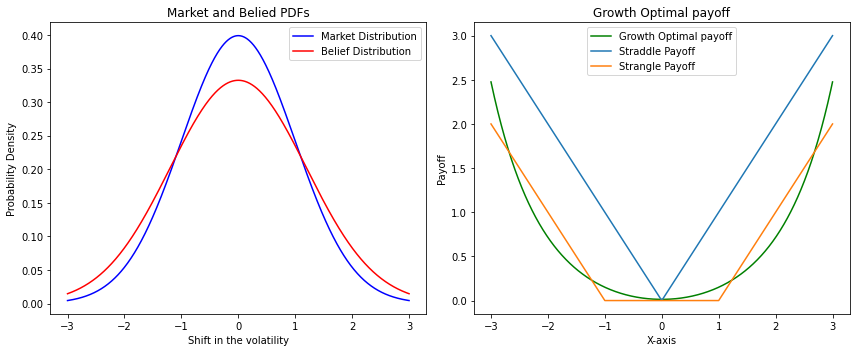

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 0
sigma = 1

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
market_pdf = norm.pdf(x, mu, sigma)
belief_pdf = norm.pdf(x, mu, 1.2 * sigma)
growth_optimal_payoff = belief_pdf / market_pdf

def call_option_payoff(spot_price, strike_price):
    return np.maximum(spot_price - strike_price, 0)

def put_option_payoff(spot_price, strike_price):
    return np.maximum(strike_price - spot_price, 0)

def straddle_payoff(spot_price, strike_price):
    call_payoff = call_option_payoff(spot_price, strike_price)
    put_payoff = put_option_payoff(spot_price, strike_price)
    return call_payoff + put_payoff

def strangle_payoff(spot_price, call_strike, put_strike):
    call_payoff = call_option_payoff(spot_price, call_strike)
    put_payoff = put_option_payoff(spot_price, put_strike)
    return call_payoff + put_payoff

straddle_strike = 0
strangle_put_strike = -1
strangle_call_strike = 1

straddle_payoff_values = straddle_payoff(x, straddle_strike)
strangle_payoff_values = strangle_payoff(x, strangle_call_strike, strangle_put_strike)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, market_pdf, label='Market Distribution', color='blue')
axs[0].plot(x, belief_pdf, label='Belief Distribution', color='red')
axs[0].set_title('Market and Belied PDFs')
axs[0].set_xlabel('Shift in the volatility')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff - 0.82, label='Growth Optimal payoff', color='green')
axs[1].plot(x, straddle_payoff_values, label='Straddle Payoff')
axs[1].plot(x, strangle_payoff_values, label='Strangle Payoff')
axs[1].set_title('Growth Optimal payoff')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Payoff')
axs[1].legend()

plt.tight_layout()
plt.show()


#### Shift in the skew

Moving on to more complex examples, let us see how we could help investors with views on the skew. For a simple, analytically tractable illustration, recall the definition of a skew-normal distribution.

The probability density for a skew-normal random variable is defined as $ SN(x,\xi) = 2\phi (x)\Phi(\xi x) $, where $\phi (x)$ and $ \Phi(x) $ are the probability density for the standard normal variable and the corresponding cumulative distribution function, respectively.

To this end, imagine a market which implies a normal distribution, $ m(x) = SN(x,0) $ for some variable x. Now consider an investor which does not agree with the market. The investor believes that, in reality, there is a skew and uses a skew-normal distribution, $ b(x) = SN(x,\xi) $, to describe this belief. For the growth-optimal payoff we compute:

$$ f(x) = \dfrac{b(x)}{m(x)} = \dfrac{SN(x,\xi)}{SN(x,0)} = 2\Phi (\xi x) $$

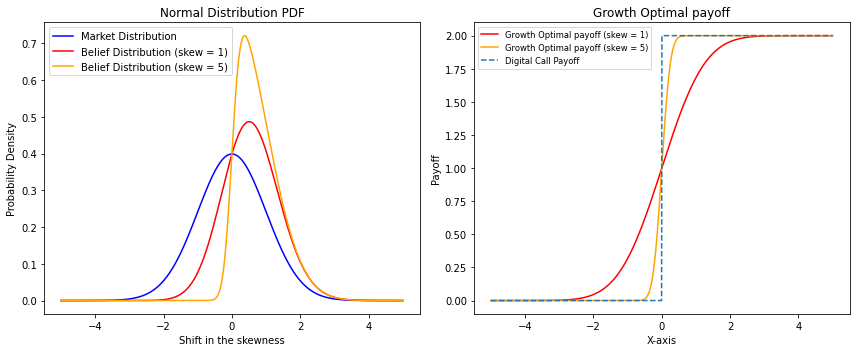

In [102]:
from scipy.stats import skewnorm

a1 = 1  # skewness parameter
a2 = 5
loc = 0 
scale = 1  


x = np.linspace(-5, 5, 1000)

market_pdf = skewnorm.pdf(x, 0, loc, scale)
belief_pdf1 = skewnorm.pdf(x, a1, loc, scale)
belief_pdf2 = skewnorm.pdf(x, a2, loc, scale)
growth_optimal_payoff1 = belief_pdf1 / market_pdf
growth_optimal_payoff2 = belief_pdf2 / market_pdf

def digital_call_payoff(spot_price, strike_price, payoff_amount=2):
    return np.where(spot_price > strike_price, payoff_amount, 0)

strike_price = 0
digital_call_payoff_values = digital_call_payoff(x, strike_price)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, market_pdf, label='Market Distribution', color='blue')
axs[0].plot(x, belief_pdf1, label='Belief Distribution (skew = 1)', color='red')
axs[0].plot(x, belief_pdf2, label='Belief Distribution (skew = 5)', color='orange')

axs[0].set_title('Normal Distribution PDF')
axs[0].set_xlabel('Shift in the skewness')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff1, label='Growth Optimal payoff (skew = 1)', color='red')
axs[1].plot(x, growth_optimal_payoff2, label='Growth Optimal payoff (skew = 5)', color='orange')
axs[1].plot(x, digital_call_payoff_values, label='Digital Call Payoff', linestyle='--')
axs[1].set_title('Growth Optimal payoff')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Payoff')
axs[1].legend(loc='upper left',fontsize='small')

plt.tight_layout()
plt.show()

We immediately recognize the profile of a cumulative distribution function which contains a classic skew product – the digital – as a limiting case.